In [131]:
import pandas as pd
import numpy as np

In [132]:
df = pd.read_csv('employee_churn_data.csv')
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


## feature engineering

### scalling

<Axes: >

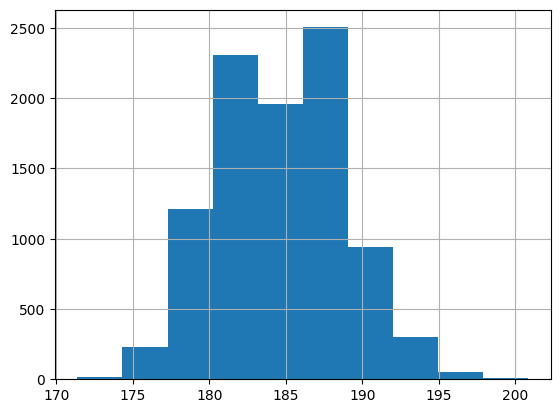

In [133]:
df.avg_hrs_month.hist()

<Axes: >

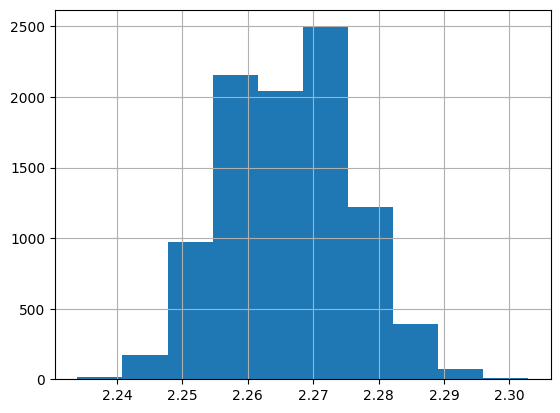

In [134]:
df.avg_hrs_month = np.log10(df.avg_hrs_month)
df.avg_hrs_month.hist()

### Categorical feature

#### department

In [135]:
from sklearn.feature_extraction.text import HashingVectorizer

hasher = HashingVectorizer(n_features= len(df.department.unique()), binary= True)
department_encoded = hasher.fit_transform(df.department).A
department_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [136]:
department_df =pd.DataFrame(department_encoded, columns= [f'department_{i}' for i in range(hasher.n_features)] )
department_df

,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9536,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [137]:
df = pd.concat([department_df, df.drop('department', axis = 1)], axis=1)
df

,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.577569,3,low,5.0,0.626759,0,2.257357,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.751900,3,medium,6.0,0.443679,0,2.261758,no
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.722548,3,medium,6.0,0.446823,0,2.265799,no
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.675158,4,high,8.0,0.440139,0,2.275789,no
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.676203,3,high,5.0,0.577607,1,2.254841,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.610988,4,medium,8.0,0.543641,0,2.274517,yes
9536,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.746887,3,medium,8.0,0.549048,0,2.274565,yes
9537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.557980,3,low,7.0,0.705425,0,2.270751,yes
9538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.584446,4,medium,8.0,0.607287,1,2.273329,yes


#### salary

In [138]:
# ดูมีการ compare ที่ถูกต้องกว่าการใช้ ordinary encoding
count = 0
for i in df["salary"].unique():
    df = df.replace(i,count)
    count += 1
df.salary

0       0
1       1
2       1
3       2
4       2
       ..
9535    1
9536    1
9537    0
9538    1
9539    0
Name: salary, Length: 9540, dtype: int64

### Discretition

#### review feature

<Axes: >

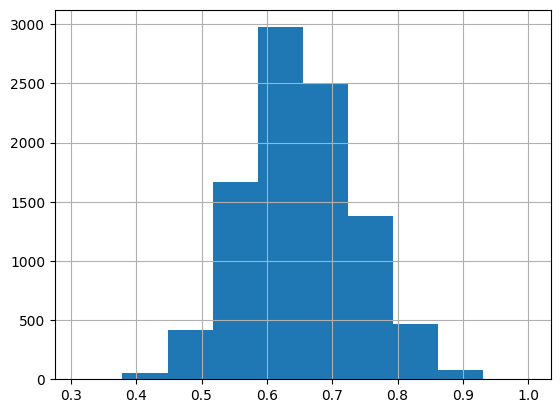

In [139]:
df.review.hist()

<Axes: >

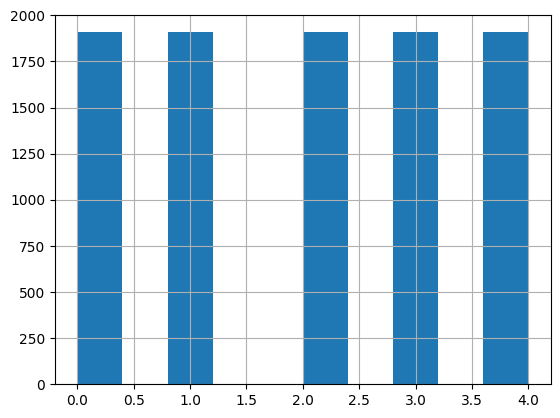

In [140]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins= 5, encode= 'ordinal')
df.review = discretizer.fit_transform(df.review.to_numpy().reshape(-1, 1))
df.review.hist()

#### satisfaction

<Axes: >

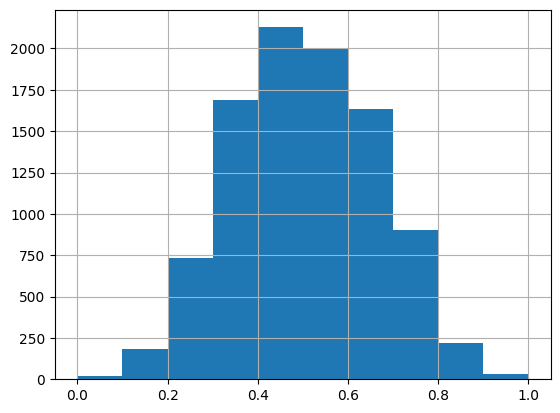

In [141]:
df.satisfaction.hist()

<Axes: >

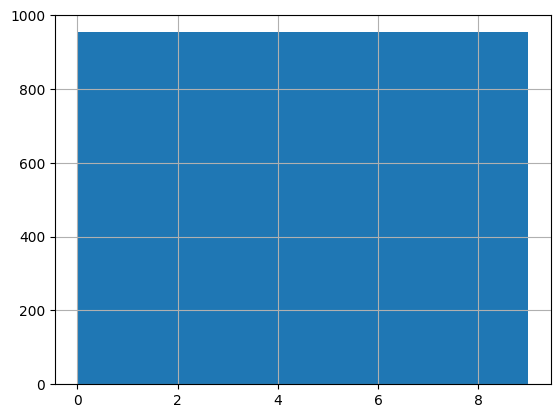

In [142]:
discretizer = KBinsDiscretizer(n_bins= 10, encode='ordinal')
df.satisfaction = discretizer.fit_transform(df.satisfaction.to_numpy().reshape(-1, 1))
df.satisfaction.hist()

#### avg_hrs_month

<Axes: >

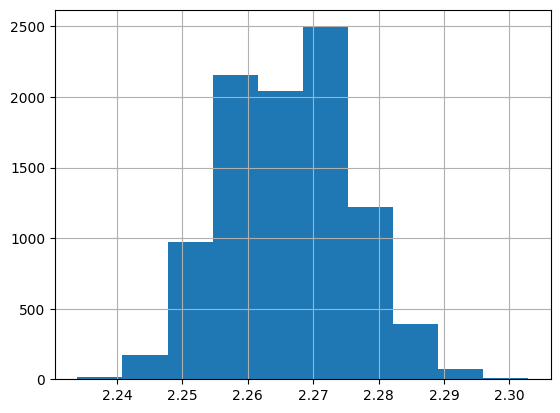

In [143]:
df.avg_hrs_month.hist()

<Axes: >

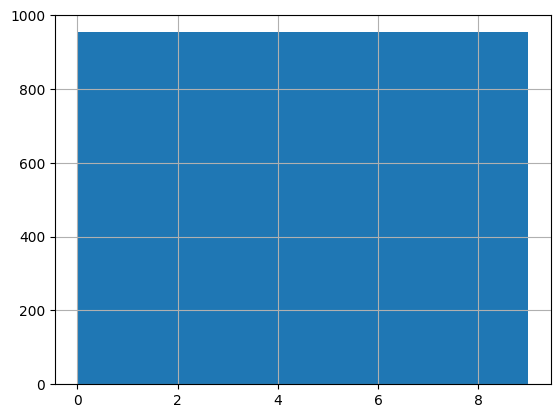

In [144]:
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal')
df.avg_hrs_month = discretizer.fit_transform(df.avg_hrs_month.to_numpy().reshape(-1, 1))
df.avg_hrs_month.hist()

In [145]:
df.avg_hrs_month.value_counts()

avg_hrs_month
2.0    954
3.0    954
4.0    954
8.0    954
1.0    954
0.0    954
5.0    954
6.0    954
7.0    954
9.0    954
Name: count, dtype: int64

In [146]:
df

,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,3,0,5.0,7.0,0,2.0,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,4.0,3,1,6.0,3.0,0,3.0,no
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3,1,6.0,3.0,0,4.0,no
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,4,2,8.0,3.0,0,8.0,no
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3,2,5.0,6.0,1,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0,4,1,8.0,5.0,0,7.0,yes
9536,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,3,1,8.0,6.0,0,7.0,yes
9537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,3,0,7.0,8.0,0,6.0,yes
9538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,4,1,8.0,7.0,1,7.0,yes


In [147]:
df.to_csv('employee_churn_data_v1.csv')